In [ ]:
from google.colab import drive
import os
import glob
import pandas as pd

drive.mount('/content/drive')
os.chdir('/content/drive/MyDrive/DADS2/MADT/Chapter 9 - Customer Segmentation')  # Replace with the actual path to your folder




Mounted at /content/drive


In [ ]:
file_pattern = '*.xlsx'  # Replace with the appropriate file extension if needed
file_paths = glob.glob(file_pattern)



In [ ]:
file_paths


['transaction 2023.xlsx',
 'data member.xlsx',
 'transaction 2021.xlsx',
 'transaction 2022.xlsx']

In [ ]:
df1=pd.read_excel(file_paths[0])


In [ ]:
df2=pd.read_excel(file_paths[1])

In [ ]:
df3=pd.read_excel(file_paths[2])

In [ ]:
df4=pd.read_excel(file_paths[3])

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590565 entries, 0 to 590564
Data columns (total 5 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   ent              590565 non-null  object
 1   original_status  590565 non-null  object
 2   join_month       590565 non-null  int64 
 3   join_year        590565 non-null  int64 
 4   sponsor          590565 non-null  object
dtypes: int64(2), object(3)
memory usage: 22.5+ MB


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 362109 entries, 0 to 362108
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   payment_date       362109 non-null  object 
 1   ent                362109 non-null  object 
 2   center             362109 non-null  object 
 3   product_json       362100 non-null  object 
 4   total_amount       362109 non-null  float64
 5   discount           361969 non-null  float64
 6   paid_amount        362109 non-null  int64  
 7   trans_origin_type  362109 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 22.1+ MB


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590565 entries, 0 to 590564
Data columns (total 5 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   ent              590565 non-null  object
 1   original_status  590565 non-null  object
 2   join_month       590565 non-null  int64 
 3   join_year        590565 non-null  int64 
 4   sponsor          590565 non-null  object
dtypes: int64(2), object(3)
memory usage: 22.5+ MB


In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 8 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   payment_date       1048575 non-null  object 
 1   ent                1048575 non-null  object 
 2   center             1048575 non-null  object 
 3   product_json       1048575 non-null  object 
 4   total_amount       1048575 non-null  float64
 5   discount           1048575 non-null  float64
 6   paid_amount        1048575 non-null  int64  
 7   trans_origin_type  1048575 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 64.0+ MB


In [ ]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 995632 entries, 0 to 995631
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   payment_date       995632 non-null  object 
 1   ent                995632 non-null  object 
 2   center             995632 non-null  object 
 3   product_json       995632 non-null  object 
 4   total_amount       995632 non-null  float64
 5   discount           995632 non-null  float64
 6   paid_amount        995632 non-null  int64  
 7   trans_origin_type  995632 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 60.8+ MB


In [ ]:
df1_1=df1.copy()
df1_1.head()

,payment_date,ent,center,product_json,total_amount,discount,paid_amount,trans_origin_type
0,2023-01-01 00:00:00.000,TCC4QCZJZQI,TKC11Z,"[{""product"":""5C4CCE"",""qty"":1},{""product"":""6CQC...",590000.0,2500.0,0,online
1,2023-01-01 00:00:00.000,TCC4QCE34Z7,T2CEQ1,"[{""product"":""BC4C41"",""qty"":2},{""product"":""6CQC...",243000.0,2500.0,240500,online
2,2023-01-01 00:00:00.000,TCC44Q3JQQ2,TFCEZ1,"[{""product"":""2C1CCW"",""qty"":1},{""product"":""2C1C...",1792000.0,0.0,0,online
3,2023-01-01 00:00:00.000,TCC41JJZCRF,TKCC3J,"[{""product"":""2C1CCW"",""qty"":2},{""product"":""2C1C...",3025000.0,0.0,0,online
4,2023-01-01 00:00:00.000,TCC4JZCJ1JK,TKCRCW,"[{""product"":""4E1J"",""qty"":2}]",198000.0,0.0,0,online


In [ ]:
df1['product_json'][0]

'[{"product":"5C4CCE","qty":1},{"product":"6CQC41","qty":1}]'

In [ ]:
import pandas as pd
import json
import numpy as np

# Assuming df is your DataFrame

# Function to extract quantity
def extract_qty(json_str):
    if pd.isnull(json_str):
        return np.nan
    else:
        data = json.loads(json_str)
        return sum(item['qty'] for item in data)



# Apply the functions to create new columns
df1_1['qty'] = df1_1['product_json'].apply(extract_qty)

In [ ]:
df1_1

,payment_date,ent,center,product_json,total_amount,discount,paid_amount,trans_origin_type,qty
0,2023-01-01 00:00:00.000,TCC4QCZJZQI,TKC11Z,"[{""product"":""5C4CCE"",""qty"":1},{""product"":""6CQC...",590000.0,2500.0,0,online,2.0
1,2023-01-01 00:00:00.000,TCC4QCE34Z7,T2CEQ1,"[{""product"":""BC4C41"",""qty"":2},{""product"":""6CQC...",243000.0,2500.0,240500,online,3.0
2,2023-01-01 00:00:00.000,TCC44Q3JQQ2,TFCEZ1,"[{""product"":""2C1CCW"",""qty"":1},{""product"":""2C1C...",1792000.0,0.0,0,online,4.0
3,2023-01-01 00:00:00.000,TCC41JJZCRF,TKCC3J,"[{""product"":""2C1CCW"",""qty"":2},{""product"":""2C1C...",3025000.0,0.0,0,online,3.0
4,2023-01-01 00:00:00.000,TCC4JZCJ1JK,TKCRCW,"[{""product"":""4E1J"",""qty"":2}]",198000.0,0.0,0,online,2.0
...,...,...,...,...,...,...,...,...,...
362104,2023-07-06 00:00:00.000,TCCEREZCC10,TKC1Z4,"[{""product"":""KCQCEJ"",""qty"":1}]",2500.0,NaN,2500,offline,1.0
362105,2023-07-06 00:00:00.000,TCCEQ1RJ3JY,TKC1Z4,"[{""product"":""KCQCEJ"",""qty"":1}]",2500.0,NaN,2500,offline,1.0
362106,2023-07-06 00:00:00.000,TCCEQ4Z4R4Y,TKC1Z4,"[{""product"":""KCQCEJ"",""qty"":1}]",2500.0,NaN,2500,offline,1.0
362107,2023-07-06 00:00:00.000,TCCEQEZJQ4F,TKC1Z4,"[{""product"":""KCQCER"",""qty"":1}]",2500.0,NaN,2500,offline,1.0


In [ ]:
# Function to extract unique product count
def extract_unique_product_count(json_str):
    if pd.isnull(json_str):
        return np.nan
    else:
        data = json.loads(json_str)
        unique_products = set(item['product'] for item in data)
        return len(unique_products)

# Apply the function to create new column
df1_1['product_variety'] = df1_1['product_json'].apply(extract_unique_product_count)


In [ ]:
df1_1

,payment_date,ent,center,product_json,total_amount,discount,paid_amount,trans_origin_type,qty,product_variety
0,2023-01-01 00:00:00.000,TCC4QCZJZQI,TKC11Z,"[{""product"":""5C4CCE"",""qty"":1},{""product"":""6CQC...",590000.0,2500.0,0,online,2.0,2.0
1,2023-01-01 00:00:00.000,TCC4QCE34Z7,T2CEQ1,"[{""product"":""BC4C41"",""qty"":2},{""product"":""6CQC...",243000.0,2500.0,240500,online,3.0,2.0
2,2023-01-01 00:00:00.000,TCC44Q3JQQ2,TFCEZ1,"[{""product"":""2C1CCW"",""qty"":1},{""product"":""2C1C...",1792000.0,0.0,0,online,4.0,3.0
3,2023-01-01 00:00:00.000,TCC41JJZCRF,TKCC3J,"[{""product"":""2C1CCW"",""qty"":2},{""product"":""2C1C...",3025000.0,0.0,0,online,3.0,2.0
4,2023-01-01 00:00:00.000,TCC4JZCJ1JK,TKCRCW,"[{""product"":""4E1J"",""qty"":2}]",198000.0,0.0,0,online,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...
362104,2023-07-06 00:00:00.000,TCCEREZCC10,TKC1Z4,"[{""product"":""KCQCEJ"",""qty"":1}]",2500.0,NaN,2500,offline,1.0,1.0
362105,2023-07-06 00:00:00.000,TCCEQ1RJ3JY,TKC1Z4,"[{""product"":""KCQCEJ"",""qty"":1}]",2500.0,NaN,2500,offline,1.0,1.0
362106,2023-07-06 00:00:00.000,TCCEQ4Z4R4Y,TKC1Z4,"[{""product"":""KCQCEJ"",""qty"":1}]",2500.0,NaN,2500,offline,1.0,1.0
362107,2023-07-06 00:00:00.000,TCCEQEZJQ4F,TKC1Z4,"[{""product"":""KCQCER"",""qty"":1}]",2500.0,NaN,2500,offline,1.0,1.0


In [ ]:
df1_1['payment_date'] = pd.to_datetime(df1_1['payment_date'])


In [ ]:
df1_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 362109 entries, 0 to 362108
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   payment_date       362109 non-null  datetime64[ns]
 1   ent                362109 non-null  object        
 2   center             362109 non-null  object        
 3   product_json       362100 non-null  object        
 4   total_amount       362109 non-null  float64       
 5   discount           361969 non-null  float64       
 6   paid_amount        362109 non-null  int64         
 7   trans_origin_type  362109 non-null  object        
 8   qty                362100 non-null  float64       
 9   product_variety    362100 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(1), object(4)
memory usage: 27.6+ MB


In [ ]:
df1_1['month'] = df1_1['payment_date'].dt.month


In [ ]:
df1_1

,payment_date,ent,center,product_json,total_amount,discount,paid_amount,trans_origin_type,qty,product_variety,month
0,2023-01-01,TCC4QCZJZQI,TKC11Z,"[{""product"":""5C4CCE"",""qty"":1},{""product"":""6CQC...",590000.0,2500.0,0,online,2.0,2.0,1
1,2023-01-01,TCC4QCE34Z7,T2CEQ1,"[{""product"":""BC4C41"",""qty"":2},{""product"":""6CQC...",243000.0,2500.0,240500,online,3.0,2.0,1
2,2023-01-01,TCC44Q3JQQ2,TFCEZ1,"[{""product"":""2C1CCW"",""qty"":1},{""product"":""2C1C...",1792000.0,0.0,0,online,4.0,3.0,1
3,2023-01-01,TCC41JJZCRF,TKCC3J,"[{""product"":""2C1CCW"",""qty"":2},{""product"":""2C1C...",3025000.0,0.0,0,online,3.0,2.0,1
4,2023-01-01,TCC4JZCJ1JK,TKCRCW,"[{""product"":""4E1J"",""qty"":2}]",198000.0,0.0,0,online,2.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...
362104,2023-07-06,TCCEREZCC10,TKC1Z4,"[{""product"":""KCQCEJ"",""qty"":1}]",2500.0,NaN,2500,offline,1.0,1.0,7
362105,2023-07-06,TCCEQ1RJ3JY,TKC1Z4,"[{""product"":""KCQCEJ"",""qty"":1}]",2500.0,NaN,2500,offline,1.0,1.0,7
362106,2023-07-06,TCCEQ4Z4R4Y,TKC1Z4,"[{""product"":""KCQCEJ"",""qty"":1}]",2500.0,NaN,2500,offline,1.0,1.0,7
362107,2023-07-06,TCCEQEZJQ4F,TKC1Z4,"[{""product"":""KCQCER"",""qty"":1}]",2500.0,NaN,2500,offline,1.0,1.0,7


In [ ]:
df1_1['bucket_id'] = df1_1['payment_date'].dt.year.astype(str) + "_" + df1_1.index.astype(str)


In [ ]:
df1_1

,payment_date,ent,center,product_json,total_amount,discount,paid_amount,trans_origin_type,qty,product_variety,month,bucket_id
0,2023-01-01,TCC4QCZJZQI,TKC11Z,"[{""product"":""5C4CCE"",""qty"":1},{""product"":""6CQC...",590000.0,2500.0,0,online,2.0,2.0,1,2023_0
1,2023-01-01,TCC4QCE34Z7,T2CEQ1,"[{""product"":""BC4C41"",""qty"":2},{""product"":""6CQC...",243000.0,2500.0,240500,online,3.0,2.0,1,2023_1
2,2023-01-01,TCC44Q3JQQ2,TFCEZ1,"[{""product"":""2C1CCW"",""qty"":1},{""product"":""2C1C...",1792000.0,0.0,0,online,4.0,3.0,1,2023_2
3,2023-01-01,TCC41JJZCRF,TKCC3J,"[{""product"":""2C1CCW"",""qty"":2},{""product"":""2C1C...",3025000.0,0.0,0,online,3.0,2.0,1,2023_3
4,2023-01-01,TCC4JZCJ1JK,TKCRCW,"[{""product"":""4E1J"",""qty"":2}]",198000.0,0.0,0,online,2.0,1.0,1,2023_4
...,...,...,...,...,...,...,...,...,...,...,...,...
362104,2023-07-06,TCCEREZCC10,TKC1Z4,"[{""product"":""KCQCEJ"",""qty"":1}]",2500.0,NaN,2500,offline,1.0,1.0,7,2023_362104
362105,2023-07-06,TCCEQ1RJ3JY,TKC1Z4,"[{""product"":""KCQCEJ"",""qty"":1}]",2500.0,NaN,2500,offline,1.0,1.0,7,2023_362105
362106,2023-07-06,TCCEQ4Z4R4Y,TKC1Z4,"[{""product"":""KCQCEJ"",""qty"":1}]",2500.0,NaN,2500,offline,1.0,1.0,7,2023_362106
362107,2023-07-06,TCCEQEZJQ4F,TKC1Z4,"[{""product"":""KCQCER"",""qty"":1}]",2500.0,NaN,2500,offline,1.0,1.0,7,2023_362107


In [ ]:
df1_1['SHOP_MONTH'] = df1_1['payment_date'].dt.to_period('M')

In [ ]:
df1_1

,payment_date,ent,center,product_json,total_amount,discount,paid_amount,trans_origin_type,qty,product_variety,month,bucket_id,SHOP_MONTH
0,2023-01-01,TCC4QCZJZQI,TKC11Z,"[{""product"":""5C4CCE"",""qty"":1},{""product"":""6CQC...",590000.0,2500.0,0,online,2.0,2.0,1,2023_0,2023-01
1,2023-01-01,TCC4QCE34Z7,T2CEQ1,"[{""product"":""BC4C41"",""qty"":2},{""product"":""6CQC...",243000.0,2500.0,240500,online,3.0,2.0,1,2023_1,2023-01
2,2023-01-01,TCC44Q3JQQ2,TFCEZ1,"[{""product"":""2C1CCW"",""qty"":1},{""product"":""2C1C...",1792000.0,0.0,0,online,4.0,3.0,1,2023_2,2023-01
3,2023-01-01,TCC41JJZCRF,TKCC3J,"[{""product"":""2C1CCW"",""qty"":2},{""product"":""2C1C...",3025000.0,0.0,0,online,3.0,2.0,1,2023_3,2023-01
4,2023-01-01,TCC4JZCJ1JK,TKCRCW,"[{""product"":""4E1J"",""qty"":2}]",198000.0,0.0,0,online,2.0,1.0,1,2023_4,2023-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
362104,2023-07-06,TCCEREZCC10,TKC1Z4,"[{""product"":""KCQCEJ"",""qty"":1}]",2500.0,NaN,2500,offline,1.0,1.0,7,2023_362104,2023-07
362105,2023-07-06,TCCEQ1RJ3JY,TKC1Z4,"[{""product"":""KCQCEJ"",""qty"":1}]",2500.0,NaN,2500,offline,1.0,1.0,7,2023_362105,2023-07
362106,2023-07-06,TCCEQ4Z4R4Y,TKC1Z4,"[{""product"":""KCQCEJ"",""qty"":1}]",2500.0,NaN,2500,offline,1.0,1.0,7,2023_362106,2023-07
362107,2023-07-06,TCCEQEZJQ4F,TKC1Z4,"[{""product"":""KCQCER"",""qty"":1}]",2500.0,NaN,2500,offline,1.0,1.0,7,2023_362107,2023-07


['transaction 2023.xlsx',
 'data member.xlsx',
 'transaction 2021.xlsx',
 'transaction 2022.xlsx']

In [ ]:
H1_2023 = df1_1[df1_1['payment_date'].dt.month <= 6]


In [ ]:
H1_2023.tail()

,payment_date,ent,center,product_json,total_amount,discount,paid_amount,trans_origin_type,qty,product_variety,month,bucket_id,SHOP_MONTH
354410,2023-06-30,TCCE444Z4QP,TIC1QZ,"[{""product"":""XCQCC4"",""qty"":1}]",50000.0,0.0,0,offline,1.0,1.0,6,2023_354410,2023-06
354411,2023-06-30,TCCE444Z4W0,TIC1QZ,"[{""product"":""XCQCC4"",""qty"":1}]",50000.0,0.0,0,offline,1.0,1.0,6,2023_354411,2023-06
354412,2023-06-30,TCCE444Z43U,TIC1QZ,"[{""product"":""XCQCC4"",""qty"":1}]",50000.0,0.0,0,offline,1.0,1.0,6,2023_354412,2023-06
354413,2023-06-30,TZZEW3QK,TIC1QZ,"[{""product"":""KCQCER"",""qty"":339},{""product"":""KC...",1692500.0,0.0,0,offline,677.0,4.0,6,2023_354413,2023-06
354414,2023-06-30,TCC41ER443P,TYCE3R,"[{""product"":""KC4C31"",""qty"":1},{""product"":""8C4C...",636000.0,0.0,0,offline,4.0,3.0,6,2023_354414,2023-06


In [ ]:
df3_1=df3.copy()

In [ ]:
import pandas as pd
import json
import numpy as np

# Assuming df is your DataFrame

# Function to extract quantity
def extract_qty(json_str):
    if pd.isnull(json_str):
        return np.nan
    else:
        data = json.loads(json_str)
        return sum(item['qty'] for item in data)



# Apply the functions to create new columns
df3_1['qty'] = df3_1['product_json'].apply(extract_qty)
# Function to extract unique product count
def extract_unique_product_count(json_str):
    if pd.isnull(json_str):
        return np.nan
    else:
        data = json.loads(json_str)
        unique_products = set(item['product'] for item in data)
        return len(unique_products)

# Apply the function to create new column
df3_1['product_variety'] = df3_1['product_json'].apply(extract_unique_product_count)
df3_1['payment_date'] = pd.to_datetime(df3_1['payment_date'])
df3_1['month'] = df3_1['payment_date'].dt.month
df3_1['bucket_id'] = df3_1['payment_date'].dt.year.astype(str) + "_" + df3_1.index.astype(str)
df3_1['SHOP_MONTH'] = df3_1['payment_date'].dt.to_period('M')

In [ ]:
df3_1

,payment_date,ent,center,product_json,total_amount,discount,paid_amount,trans_origin_type,qty,product_variety,month,bucket_id,SHOP_MONTH
0,2021-01-01,TCC43RQQZ3B,TKC4CJ,"[{""product"":""1ECZ"",""qty"":1},{""product"":""8CEC4Q...",1627000.0,0.0,0,online,2,2,1,2021_0,2021-01
1,2021-01-01,TCC4Q4JZ4Q0,TKCEWQ,"[{""product"":""4E4W"",""qty"":2},{""product"":""DC4CC4...",594000.0,0.0,0,online,3,2,1,2021_1,2021-01
2,2021-01-01,TCC4RJ11QE7,TKC14E,"[{""product"":""IC4CC4"",""qty"":1}]",468000.0,0.0,0,online,1,1,1,2021_2,2021-01
3,2021-01-01,TCC434QRCJY,TKC14R,"[{""product"":""5C4CC4"",""qty"":1}]",341000.0,0.0,0,online,1,1,1,2021_3,2021-01
4,2021-01-01,TCC43RRCE10,TKC11Z,"[{""product"":""5C4C4Q"",""qty"":1}]",189000.0,0.0,0,online,1,1,1,2021_4,2021-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,2021-06-23,TCC4Q4ZWJZ7,TKC41J,"[{""product"":""5C4CCE"",""qty"":3},{""product"":""5CJC...",1944000.0,189000.0,0,offline,4,2,6,2021_1048570,2021-06
1048571,2021-06-23,TCCECQQ1CJI,TUC1CC,"[{""product"":""5CJCCW"",""qty"":1},{""product"":""8C4C...",1729000.0,189000.0,0,offline,3,2,6,2021_1048571,2021-06
1048572,2021-06-23,TCC4Q3R1RJ2,T7CERW,"[{""product"":""5C4CCE"",""qty"":3},{""product"":""5CJC...",1949000.0,191500.0,0,online,5,3,6,2021_1048572,2021-06
1048573,2021-06-23,TCCECQ4RR1I,T8CCR4,"[{""product"":""OC4CC4"",""qty"":1}]",1169000.0,0.0,0,online,1,1,6,2021_1048573,2021-06


In [ ]:
H1_2021 = df3_1

In [ ]:
H1_2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 13 columns):
 #   Column             Non-Null Count    Dtype         
---  ------             --------------    -----         
 0   payment_date       1048575 non-null  datetime64[ns]
 1   ent                1048575 non-null  object        
 2   center             1048575 non-null  object        
 3   product_json       1048575 non-null  object        
 4   total_amount       1048575 non-null  float64       
 5   discount           1048575 non-null  float64       
 6   paid_amount        1048575 non-null  int64         
 7   trans_origin_type  1048575 non-null  object        
 8   qty                1048575 non-null  int64         
 9   product_variety    1048575 non-null  int64         
 10  month              1048575 non-null  int64         
 11  bucket_id          1048575 non-null  object        
 12  SHOP_MONTH         1048575 non-null  period[M]     
dtypes: datetime64[ns](1), float

In [ ]:
H1_2021.tail()

,payment_date,ent,center,product_json,total_amount,discount,paid_amount,trans_origin_type,qty,product_variety,month,bucket_id,SHOP_MONTH
1048570,2021-06-23,TCC4Q4ZWJZ7,TKC41J,"[{""product"":""5C4CCE"",""qty"":3},{""product"":""5CJC...",1944000.0,189000.0,0,offline,4,2,6,2021_1048570,2021-06
1048571,2021-06-23,TCCECQQ1CJI,TUC1CC,"[{""product"":""5CJCCW"",""qty"":1},{""product"":""8C4C...",1729000.0,189000.0,0,offline,3,2,6,2021_1048571,2021-06
1048572,2021-06-23,TCC4Q3R1RJ2,T7CERW,"[{""product"":""5C4CCE"",""qty"":3},{""product"":""5CJC...",1949000.0,191500.0,0,online,5,3,6,2021_1048572,2021-06
1048573,2021-06-23,TCCECQ4RR1I,T8CCR4,"[{""product"":""OC4CC4"",""qty"":1}]",1169000.0,0.0,0,online,1,1,6,2021_1048573,2021-06
1048574,2021-06-23,TCC4QC4QQZ2,TKC41J,"[{""product"":""5C4CC4"",""qty"":11},{""product"":""5CJ...",4063000.0,378000.0,0,offline,13,2,6,2021_1048574,2021-06


In [ ]:
df4_1=df4.copy()

In [ ]:
import pandas as pd
import json
import numpy as np

# Assuming df is your DataFrame

# Function to extract quantity
def extract_qty(json_str):
    if pd.isnull(json_str):
        return np.nan
    else:
        data = json.loads(json_str)
        return sum(item['qty'] for item in data)



# Apply the functions to create new columns
df4_1['qty'] = df4_1['product_json'].apply(extract_qty)
# Function to extract unique product count
def extract_unique_product_count(json_str):
    if pd.isnull(json_str):
        return np.nan
    else:
        data = json.loads(json_str)
        unique_products = set(item['product'] for item in data)
        return len(unique_products)

# Apply the function to create new column
df4_1['product_variety'] = df4_1['product_json'].apply(extract_unique_product_count)
df4_1['payment_date'] = pd.to_datetime(df4_1['payment_date'])
df4_1['month'] = df4_1['payment_date'].dt.month
df4_1['bucket_id'] = df4_1['payment_date'].dt.year.astype(str) + "_" + df4_1.index.astype(str)
df4_1['SHOP_MONTH'] = df4_1['payment_date'].dt.to_period('M')

In [ ]:
df4_1.tail()

,payment_date,ent,center,product_json,total_amount,discount,paid_amount,trans_origin_type,qty,product_variety,month,bucket_id,SHOP_MONTH
995627,2022-12-31,TCCE1EEZZ3B,TDC1ZR,"[{""product"":""KCQCEJ"",""qty"":1}]",2500.0,0.0,0,offline,1,1,12,2022_995627,2022-12
995628,2022-12-31,TCCEC1WZJRU,TDC1ZR,"[{""product"":""KCQCEJ"",""qty"":1}]",2500.0,0.0,0,offline,1,1,12,2022_995628,2022-12
995629,2022-12-31,TC1JZR1U,T8CCR4,"[{""product"":""KCQCEJ"",""qty"":3},{""product"":""KCQC...",17500.0,0.0,17500,offline,7,2,12,2022_995629,2022-12
995630,2022-12-31,TCCEJ34RWE2,T8CCR4,"[{""product"":""XCQCC4"",""qty"":1}]",50000.0,0.0,50000,offline,1,1,12,2022_995630,2022-12
995631,2022-12-31,T4141QZY,T2CEQ1,"[{""product"":""KCQCER"",""qty"":2},{""product"":""KCQC...",12500.0,0.0,12500,offline,5,2,12,2022_995631,2022-12


In [ ]:
H1_2022 = df4_1[df4_1['payment_date'].dt.month <= 6]


In [ ]:
H1_2022.tail()

,payment_date,ent,center,product_json,total_amount,discount,paid_amount,trans_origin_type,qty,product_variety,month,bucket_id,SHOP_MONTH
546229,2022-06-30,TCC4E4WECRI,TKC41J,"[{""product"":""4E1J"",""qty"":1}]",99000.0,0.0,0,offline,1,1,6,2022_546229,2022-06
546230,2022-06-30,TCC4WCWWEJY,TKC41J,"[{""product"":""5C4CCE"",""qty"":2},{""product"":""5C4C...",2023000.0,335000.0,0,offline,6,5,6,2022_546230,2022-06
546231,2022-06-30,TRZCZRE0,TKC41J,"[{""product"":""5CECCZ"",""qty"":1},{""product"":""0CEC...",3272000.0,0.0,0,offline,4,3,6,2022_546231,2022-06
546232,2022-06-30,TCCERECZZJ0,TKC41J,"[{""product"":""0C4CCZ"",""qty"":1}]",159000.0,0.0,0,offline,1,1,6,2022_546232,2022-06
546233,2022-06-30,TCCECRWZRZ5,TKC41J,"[{""product"":""5CJC41"",""qty"":1},{""product"":""7C4C...",2051000.0,335000.0,0,offline,6,4,6,2022_546233,2022-06


In [ ]:
H2_2022 = df4_1[df4_1['payment_date'].dt.month >= 7]


In [ ]:
H1_2022.tail()

,payment_date,ent,center,product_json,total_amount,discount,paid_amount,trans_origin_type,qty,product_variety,month,bucket_id,SHOP_MONTH
546229,2022-06-30,TCC4E4WECRI,TKC41J,"[{""product"":""4E1J"",""qty"":1}]",99000.0,0.0,0,offline,1,1,6,2022_546229,2022-06
546230,2022-06-30,TCC4WCWWEJY,TKC41J,"[{""product"":""5C4CCE"",""qty"":2},{""product"":""5C4C...",2023000.0,335000.0,0,offline,6,5,6,2022_546230,2022-06
546231,2022-06-30,TRZCZRE0,TKC41J,"[{""product"":""5CECCZ"",""qty"":1},{""product"":""0CEC...",3272000.0,0.0,0,offline,4,3,6,2022_546231,2022-06
546232,2022-06-30,TCCERECZZJ0,TKC41J,"[{""product"":""0C4CCZ"",""qty"":1}]",159000.0,0.0,0,offline,1,1,6,2022_546232,2022-06
546233,2022-06-30,TCCECRWZRZ5,TKC41J,"[{""product"":""5CJC41"",""qty"":1},{""product"":""7C4C...",2051000.0,335000.0,0,offline,6,4,6,2022_546233,2022-06


In [ ]:
H1_2022.to_csv('H1_2022.csv', index=False)


In [ ]:
pip install gspread pandas oauth2client


In [ ]:
H1_2021.to_csv('H1_2021.csv', index=False)


In [ ]:
H1_2023.to_csv('H1_2023.csv', index=False)

In [ ]:
pip install fastavro


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 26.3 MB/s eta 0:00:00


In [ ]:
import fastavro
import pandas as pd

In [ ]:
df = H1_2021.copy()

# Convert timestamp values to string format
df['payment_date'] = df['payment_date'].dt.strftime('%Y-%m-%d')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 13 columns):
 #   Column             Non-Null Count    Dtype    
---  ------             --------------    -----    
 0   payment_date       1048575 non-null  object   
 1   ent                1048575 non-null  object   
 2   center             1048575 non-null  object   
 3   product_json       1048575 non-null  object   
 4   total_amount       1048575 non-null  float64  
 5   discount           1048575 non-null  float64  
 6   paid_amount        1048575 non-null  int64    
 7   trans_origin_type  1048575 non-null  object   
 8   qty                1048575 non-null  int64    
 9   product_variety    1048575 non-null  int64    
 10  month              1048575 non-null  int64    
 11  bucket_id          1048575 non-null  object   
 12  SHOP_MONTH         1048575 non-null  period[M]
dtypes: float64(2), int64(4), object(6), period[M](1)
memory usage: 104.0+ MB


In [ ]:
df.to_csv('H1_2021.csv', index=False)


In [ ]:
H1_2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 13 columns):
 #   Column             Non-Null Count    Dtype         
---  ------             --------------    -----         
 0   payment_date       1048575 non-null  datetime64[ns]
 1   ent                1048575 non-null  object        
 2   center             1048575 non-null  object        
 3   product_json       1048575 non-null  object        
 4   total_amount       1048575 non-null  float64       
 5   discount           1048575 non-null  float64       
 6   paid_amount        1048575 non-null  int64         
 7   trans_origin_type  1048575 non-null  object        
 8   qty                1048575 non-null  int64         
 9   product_variety    1048575 non-null  int64         
 10  month              1048575 non-null  int64         
 11  bucket_id          1048575 non-null  object        
 12  SHOP_MONTH         1048575 non-null  period[M]     
dtypes: datetime64[ns](1), float

In [ ]:
H2_2022

,payment_date,ent,center,product_json,total_amount,discount,paid_amount,trans_origin_type,qty,product_variety,month,bucket_id,SHOP_MONTH
546234,2022-07-01,TCC434ZZQJP,TFCCQ3,"[{""product"":""8C4CCQ"",""qty"":1}]",39000.0,0.0,0,online,1,1,7,2022_546234,2022-07
546235,2022-07-01,TCCEE444Z1U,TKCC1C,"[{""product"":""5C4C44"",""qty"":1},{""product"":""5CJC...",1903000.0,337500.0,0,online,10,9,7,2022_546235,2022-07
546236,2022-07-01,TCC4RCQQZJP,TKC44R,"[{""product"":""5C4CCE"",""qty"":1},{""product"":""5CJC...",1938000.0,335000.0,0,online,5,5,7,2022_546236,2022-07
546237,2022-07-01,TCCEEC1RWEB,TKC4EZ,"[{""product"":""5C4CCE"",""qty"":1},{""product"":""6CQC...",590000.0,2500.0,0,online,2,2,7,2022_546237,2022-07
546238,2022-07-01,TCC44JZ14ZB,TKC41J,"[{""product"":""8C4CCR"",""qty"":2}]",1218000.0,0.0,0,online,2,1,7,2022_546238,2022-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995627,2022-12-31,TCCE1EEZZ3B,TDC1ZR,"[{""product"":""KCQCEJ"",""qty"":1}]",2500.0,0.0,0,offline,1,1,12,2022_995627,2022-12
995628,2022-12-31,TCCEC1WZJRU,TDC1ZR,"[{""product"":""KCQCEJ"",""qty"":1}]",2500.0,0.0,0,offline,1,1,12,2022_995628,2022-12
995629,2022-12-31,TC1JZR1U,T8CCR4,"[{""product"":""KCQCEJ"",""qty"":3},{""product"":""KCQC...",17500.0,0.0,17500,offline,7,2,12,2022_995629,2022-12
995630,2022-12-31,TCCEJ34RWE2,T8CCR4,"[{""product"":""XCQCC4"",""qty"":1}]",50000.0,0.0,50000,offline,1,1,12,2022_995630,2022-12


In [ ]:
H1_2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 13 columns):
 #   Column             Non-Null Count    Dtype         
---  ------             --------------    -----         
 0   payment_date       1048575 non-null  datetime64[ns]
 1   ent                1048575 non-null  object        
 2   center             1048575 non-null  object        
 3   product_json       1048575 non-null  object        
 4   total_amount       1048575 non-null  float64       
 5   discount           1048575 non-null  float64       
 6   paid_amount        1048575 non-null  int64         
 7   trans_origin_type  1048575 non-null  object        
 8   qty                1048575 non-null  int64         
 9   product_variety    1048575 non-null  int64         
 10  month              1048575 non-null  int64         
 11  bucket_id          1048575 non-null  object        
 12  SHOP_MONTH         1048575 non-null  period[M]     
dtypes: datetime64[ns](1), float

In [ ]:
import pandas as pd
from pandasql import sqldf

query = """
SELECT
    A.ent ,
    LAST_VISIT,
    TOTAL_VISIT,
    TOTAL_SPEND,
    AVG_MONTHLY_VISIT,
    AVG_MONTHLY_SPEND,
    AVG_BASKET_SIZE,

FROM
    (SELECT
        ent ,
        MAX(payment_date) AS LAST_VISIT,
        MAX(bucket_id) AS LAST_BASKET_ID,
        COUNT(DISTINCT bucket_id) AS TOTAL_VISIT,
        SUM(total_amount) AS TOTAL_SPEND,
        COUNT(DISTINCT bucket_id) / COUNT(DISTINCT SHOP_MONTH) AS AVG_MONTHLY_VISIT,
        SUM(total_amount) / COUNT(DISTINCT SHOP_MONTH) AS AVG_MONTHLY_SPEND,
        SUM(total_amount) / COUNT(DISTINCT bucket_id) AS AVG_BASKET_SIZE
    FROM
        db
    WHERE
        ent IS NOT NULL
    GROUP BY
        ent,
        SHOP_MONTH) A
"""
pd.read_sql_query(query,con)



In [ ]:
import csv

In [ ]:
H1_2021_AVG = pd.read_csv('/content/H1_2021_AVG.csv')

In [ ]:
H1_2021_AVG

,ent,LAST_VISIT,TOTAL_VISIT,TOTAL_SPEND,AVG_MONTHLY_VISIT,AVG_MONTHLY_SPEND,AVG_BASKET_SIZE
0,TCC4RJ11QE7,2021-06-02,15,16723000,3.750000,4.180750e+06,1.114867e+06
1,TCC43C3JRJ5,2021-04-23,14,2811500,3.500000,7.028750e+05,2.008214e+05
2,TZEEQRRU,2021-06-10,17,13326000,2.833333,2.221000e+06,7.838824e+05
3,TCC4QEZQW4I,2021-05-08,28,9670000,5.600000,1.934000e+06,3.453571e+05
4,TCC41E3E142,2021-06-09,37,27613000,6.166667,4.602167e+06,7.462973e+05
...,...,...,...,...,...,...,...
325622,TCCECE4E1ZF,2021-06-20,13,6682500,4.333333,2.227500e+06,5.140385e+05
325623,TCCECE4C43I,2021-06-11,13,6357500,4.333333,2.119167e+06,4.890385e+05
325624,TCC4QR314RY,2021-06-21,13,9102500,6.500000,4.551250e+06,7.001923e+05
325625,TCCEC1CCRCK,2021-06-22,13,6560500,6.500000,3.280250e+06,5.046538e+05


In [ ]:
H1_2022_AVG = pd.read_csv('/content/H1_2022_AVG.csv')

In [ ]:
H1_2022_AVG

,ent,LAST_VISIT,TOTAL_VISIT,TOTAL_SPEND,AVG_MONTHLY_VISIT,AVG_MONTHLY_SPEND,AVG_BASKET_SIZE
0,TCC4ZWWCE37,2022-06-04,15,10212000,2.500000,1.702000e+06,6.808000e+05
1,TCC4E1JJ3C0,2022-06-29,19,20718000,3.166667,3.453000e+06,1.090421e+06
2,TCC4ZWRQECI,2022-06-20,20,21564000,3.333333,3.594000e+06,1.078200e+06
3,TCCE1R14Q17,2022-06-30,25,11142000,4.166667,1.857000e+06,4.456800e+05
4,TCC4EERQ410,2022-06-18,18,12901000,3.000000,2.150167e+06,7.167222e+05
...,...,...,...,...,...,...,...
184453,TCCERQR33CF,2022-06-28,13,3747000,4.333333,1.249000e+06,2.882308e+05
184454,TCCERW1Q1QF,2022-06-18,13,3854000,4.333333,1.284667e+06,2.964615e+05
184455,TCC4144JJ3U,2022-06-08,13,3246000,6.500000,1.623000e+06,2.496923e+05
184456,TCCER3QQJR0,2022-06-29,13,3691000,6.500000,1.845500e+06,2.839231e+05


In [ ]:
H2_2022_AVG = pd.read_csv('/content/H2_2022_AVG.csv')

In [ ]:
H2_2022_AVG

,ent,LAST_VISIT,TOTAL_VISIT,TOTAL_SPEND,AVG_MONTHLY_VISIT,AVG_MONTHLY_SPEND,AVG_BASKET_SIZE
0,TCC4ZQWEJ4F,2022-12-24,17,24091000,3.400000,4.818200e+06,1.417118e+06
1,TCC4JRCJ440,2022-12-19,34,17059000,5.666667,2.843167e+06,5.017353e+05
2,TCC4CWCECZY,2022-12-26,19,12990000,3.166667,2.165000e+06,6.836842e+05
3,TCC4QJ3344F,2022-12-28,17,10175400,2.833333,1.695900e+06,5.985529e+05
4,TCC41J3R4W0,2022-12-29,19,8863500,3.166667,1.477250e+06,4.665000e+05
...,...,...,...,...,...,...,...
143010,TCCEJRZ11C2,2022-12-20,13,1629500,6.500000,8.147500e+05,1.253462e+05
143011,TCCEJJJ3JWB,2022-12-20,13,1643000,6.500000,8.215000e+05,1.263846e+05
143012,TCCER3E4RZI,2022-12-31,13,3944000,6.500000,1.972000e+06,3.033846e+05
143013,TCCEJJECQQF,2022-12-30,13,1793000,6.500000,8.965000e+05,1.379231e+05


In [ ]:
H1_2023_AVG = pd.read_csv('/content/H1_2023_AVG.csv')

In [ ]:
H1_2021

,payment_date,ent,center,product_json,total_amount,discount,paid_amount,trans_origin_type,qty,product_variety,month,bucket_id,SHOP_MONTH,REV_PER_UNIT
0,2021-01-01,TCC43RQQZ3B,TKC4CJ,"[{""product"":""1ECZ"",""qty"":1},{""product"":""8CEC4Q...",1627000.0,0.0,0,online,2,2,1,2021_0,2021-01,8.135000e+05
1,2021-01-01,TCC4Q4JZ4Q0,TKCEWQ,"[{""product"":""4E4W"",""qty"":2},{""product"":""DC4CC4...",594000.0,0.0,0,online,3,2,1,2021_1,2021-01,1.980000e+05
2,2021-01-01,TCC4RJ11QE7,TKC14E,"[{""product"":""IC4CC4"",""qty"":1}]",468000.0,0.0,0,online,1,1,1,2021_2,2021-01,4.680000e+05
3,2021-01-01,TCC434QRCJY,TKC14R,"[{""product"":""5C4CC4"",""qty"":1}]",341000.0,0.0,0,online,1,1,1,2021_3,2021-01,3.410000e+05
4,2021-01-01,TCC43RRCE10,TKC11Z,"[{""product"":""5C4C4Q"",""qty"":1}]",189000.0,0.0,0,online,1,1,1,2021_4,2021-01,1.890000e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,2021-06-23,TCC4Q4ZWJZ7,TKC41J,"[{""product"":""5C4CCE"",""qty"":3},{""product"":""5CJC...",1944000.0,189000.0,0,offline,4,2,6,2021_1048570,2021-06,4.860000e+05
1048571,2021-06-23,TCCECQQ1CJI,TUC1CC,"[{""product"":""5CJCCW"",""qty"":1},{""product"":""8C4C...",1729000.0,189000.0,0,offline,3,2,6,2021_1048571,2021-06,5.763333e+05
1048572,2021-06-23,TCC4Q3R1RJ2,T7CERW,"[{""product"":""5C4CCE"",""qty"":3},{""product"":""5CJC...",1949000.0,191500.0,0,online,5,3,6,2021_1048572,2021-06,3.898000e+05
1048573,2021-06-23,TCCECQ4RR1I,T8CCR4,"[{""product"":""OC4CC4"",""qty"":1}]",1169000.0,0.0,0,online,1,1,6,2021_1048573,2021-06,1.169000e+06


In [ ]:
['transaction 2023.xlsx',
 'data member.xlsx',
 'transaction 2021.xlsx',
 'transaction 2022.xlsx']


In [ ]:
import csv

In [ ]:
H1_2021 = pd.read_csv('H1_2021.csv')

In [ ]:
H1_2022 = pd.read_csv('H1_2022.csv')

In [ ]:
H2_2022 = pd.read_csv('H2_2022.csv')

In [ ]:
H1_2023 = pd.read_csv('H1_2023.csv')

In [ ]:
H1_2021['REV_PER_UNIT'] = H1_2021['total_amount'] / H1_2021['qty']


In [ ]:
H1_2021

,payment_date,ent,center,product_json,total_amount,discount,paid_amount,trans_origin_type,qty,product_variety,month,bucket_id,SHOP_MONTH,REV_PER_UNIT
0,2021-01-01,TCC43RQQZ3B,TKC4CJ,"[{""product"":""1ECZ"",""qty"":1},{""product"":""8CEC4Q...",1627000.0,0.0,0,online,2,2,1,2021_0,2021-01,8.135000e+05
1,2021-01-01,TCC4Q4JZ4Q0,TKCEWQ,"[{""product"":""4E4W"",""qty"":2},{""product"":""DC4CC4...",594000.0,0.0,0,online,3,2,1,2021_1,2021-01,1.980000e+05
2,2021-01-01,TCC4RJ11QE7,TKC14E,"[{""product"":""IC4CC4"",""qty"":1}]",468000.0,0.0,0,online,1,1,1,2021_2,2021-01,4.680000e+05
3,2021-01-01,TCC434QRCJY,TKC14R,"[{""product"":""5C4CC4"",""qty"":1}]",341000.0,0.0,0,online,1,1,1,2021_3,2021-01,3.410000e+05
4,2021-01-01,TCC43RRCE10,TKC11Z,"[{""product"":""5C4C4Q"",""qty"":1}]",189000.0,0.0,0,online,1,1,1,2021_4,2021-01,1.890000e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,2021-06-23,TCC4Q4ZWJZ7,TKC41J,"[{""product"":""5C4CCE"",""qty"":3},{""product"":""5CJC...",1944000.0,189000.0,0,offline,4,2,6,2021_1048570,2021-06,4.860000e+05
1048571,2021-06-23,TCCECQQ1CJI,TUC1CC,"[{""product"":""5CJCCW"",""qty"":1},{""product"":""8C4C...",1729000.0,189000.0,0,offline,3,2,6,2021_1048571,2021-06,5.763333e+05
1048572,2021-06-23,TCC4Q3R1RJ2,T7CERW,"[{""product"":""5C4CCE"",""qty"":3},{""product"":""5CJC...",1949000.0,191500.0,0,online,5,3,6,2021_1048572,2021-06,3.898000e+05
1048573,2021-06-23,TCCECQ4RR1I,T8CCR4,"[{""product"":""OC4CC4"",""qty"":1}]",1169000.0,0.0,0,online,1,1,6,2021_1048573,2021-06,1.169000e+06


In [ ]:
H1_2022['REV_PER_UNIT'] = H1_2022['total_amount'] / H1_2022['qty']


In [ ]:
H2_2022['REV_PER_UNIT'] = H2_2022['total_amount'] / H2_2022['qty']


In [ ]:
H1_2023['REV_PER_UNIT'] = H1_2023['total_amount'] / H1_2023['qty']


In [ ]:
H1_2021_grouped = H1_2021.groupby('ent')['REV_PER_UNIT'].mean().reset_index()
# Perform the left join
H1_2021_AVG = pd.merge(H1_2021_AVG, H1_2021_grouped, on='ent', how='left')


In [ ]:
H1_2021_AVG

,ent,LAST_VISIT,TOTAL_VISIT,TOTAL_SPEND,AVG_MONTHLY_VISIT,AVG_MONTHLY_SPEND,AVG_BASKET_SIZE,REV_PER_UNIT
0,TCC4RJ11QE7,2021-06-02,15,16723000,3.750000,4.180750e+06,1.114867e+06,357910.476190
1,TCC43C3JRJ5,2021-04-23,14,2811500,3.500000,7.028750e+05,2.008214e+05,200821.428571
2,TZEEQRRU,2021-06-10,17,13326000,2.833333,2.221000e+06,7.838824e+05,470274.509804
3,TCC4QEZQW4I,2021-05-08,28,9670000,5.600000,1.934000e+06,3.453571e+05,262857.142857
4,TCC41E3E142,2021-06-09,37,27613000,6.166667,4.602167e+06,7.462973e+05,360878.378378
...,...,...,...,...,...,...,...,...
325622,TCCECE4E1ZF,2021-06-20,13,6682500,4.333333,2.227500e+06,5.140385e+05,314064.102564
325623,TCCECE4C43I,2021-06-11,13,6357500,4.333333,2.119167e+06,4.890385e+05,346282.051282
325624,TCC4QR314RY,2021-06-21,13,9102500,6.500000,4.551250e+06,7.001923e+05,396493.589744
325625,TCCEC1CCRCK,2021-06-22,13,6560500,6.500000,3.280250e+06,5.046538e+05,240301.282051


In [ ]:
H1_2021_AVG.to_csv('CUS_H1_2021.csv', index=False)


In [ ]:
H1_2022_grouped = H1_2022.groupby('ent')['REV_PER_UNIT'].mean().reset_index()
# Perform the left join
H1_2022_AVG = pd.merge(H1_2022_AVG, H1_2022_grouped, on='ent', how='left')


In [ ]:
H1_2022_AVG

,ent,LAST_VISIT,TOTAL_VISIT,TOTAL_SPEND,AVG_MONTHLY_VISIT,AVG_MONTHLY_SPEND,AVG_BASKET_SIZE,REV_PER_UNIT
0,TCC4ZWWCE37,2022-06-04,15,10212000,2.500000,1.702000e+06,6.808000e+05,166946.666667
1,TCC4E1JJ3C0,2022-06-29,19,20718000,3.166667,3.453000e+06,1.090421e+06,383166.004171
2,TCC4ZWRQECI,2022-06-20,20,21564000,3.333333,3.594000e+06,1.078200e+06,245719.404762
3,TCCE1R14Q17,2022-06-30,25,11142000,4.166667,1.857000e+06,4.456800e+05,190126.111111
4,TCC4EERQ410,2022-06-18,18,12901000,3.000000,2.150167e+06,7.167222e+05,327806.481481
...,...,...,...,...,...,...,...,...
184453,TCCERQR33CF,2022-06-28,13,3747000,4.333333,1.249000e+06,2.882308e+05,248974.358974
184454,TCCERW1Q1QF,2022-06-18,13,3854000,4.333333,1.284667e+06,2.964615e+05,182230.769231
184455,TCC4144JJ3U,2022-06-08,13,3246000,6.500000,1.623000e+06,2.496923e+05,234769.230769
184456,TCCER3QQJR0,2022-06-29,13,3691000,6.500000,1.845500e+06,2.839231e+05,157269.230769


In [ ]:
H1_2022_AVG.to_csv('CUS_H1_2022.csv', index=False)


In [ ]:
H2_2022_grouped = H2_2022.groupby('ent')['REV_PER_UNIT'].mean().reset_index()
# Perform the left join
H2_2022_AVG = pd.merge(H2_2022_AVG, H2_2022_grouped, on='ent', how='left')


In [ ]:
H2_2022_AVG

,ent,LAST_VISIT,TOTAL_VISIT,TOTAL_SPEND,AVG_MONTHLY_VISIT,AVG_MONTHLY_SPEND,AVG_BASKET_SIZE,REV_PER_UNIT
0,TCC4ZQWEJ4F,2022-12-24,17,24091000,3.400000,4.818200e+06,1.417118e+06,368049.465241
1,TCC4JRCJ440,2022-12-19,34,17059000,5.666667,2.843167e+06,5.017353e+05,207514.379085
2,TCC4CWCECZY,2022-12-26,19,12990000,3.166667,2.165000e+06,6.836842e+05,413586.842105
3,TCC4QJ3344F,2022-12-28,17,10175400,2.833333,1.695900e+06,5.985529e+05,506219.607843
4,TCC41J3R4W0,2022-12-29,19,8863500,3.166667,1.477250e+06,4.665000e+05,197740.829346
...,...,...,...,...,...,...,...,...
143010,TCCEJRZ11C2,2022-12-20,13,1629500,6.500000,8.147500e+05,1.253462e+05,69192.307692
143011,TCCEJJJ3JWB,2022-12-20,13,1643000,6.500000,8.215000e+05,1.263846e+05,65653.846154
143012,TCCER3E4RZI,2022-12-31,13,3944000,6.500000,1.972000e+06,3.033846e+05,136615.384615
143013,TCCEJJECQQF,2022-12-30,13,1793000,6.500000,8.965000e+05,1.379231e+05,122038.461538


In [ ]:
H2_2022_grouped

,ent,REV_PER_UNIT
0,8CCCCCC4R1F,228500.000000
1,BC1CW3Z5,238000.000000
2,BCCCCRE3E1F,238000.000000
3,BCCCCRE3QQI,20750.000000
4,BCCCCREW3WY,185666.666667
...,...,...
143010,TZZZEQ4Y,493000.000000
143011,TZZZEZCP,187000.000000
143012,TZZZJ3WP,623350.000000
143013,TZZZREZF,332408.163265


In [ ]:
H2_2022_AVG.to_csv('CUS_H2_2022.csv', index=False)


In [ ]:
H1_2023_grouped = H1_2023.groupby('ent')['REV_PER_UNIT'].mean().reset_index()
# Perform the left join
H1_2023_AVG = pd.merge(H1_2023_AVG, H1_2023_grouped, on='ent', how='left')


In [ ]:
H1_2023_AVG

,ent,LAST_VISIT,TOTAL_VISIT,TOTAL_SPEND,AVG_MONTHLY_VISIT,AVG_MONTHLY_SPEND,AVG_BASKET_SIZE,REV_PER_UNIT
0,TCC4JZCEWZ7,2023-06-06,18,16960500,3.000000,2.826750e+06,9.422500e+05,313769.620811
1,TCC4Q4WJCZ2,2023-06-30,39,26856000,6.500000,4.476000e+06,6.886154e+05,263603.565879
2,TCC4EZR4Z3P,2023-06-28,28,24039000,4.666667,4.006500e+06,8.585357e+05,311420.887446
3,TCC4R4EQWZP,2023-06-30,17,17600000,2.833333,2.933333e+06,1.035294e+06,310781.372549
4,TCC44EWQRJ5,2023-06-17,23,18036500,3.833333,3.006083e+06,7.841957e+05,376568.840580
...,...,...,...,...,...,...,...,...
100264,TCC43W14CC7,2023-06-30,14,6729000,2.333333,1.121500e+06,4.806429e+05,250428.571429
100265,TCC4C313REK,2023-06-22,14,4954000,2.333333,8.256667e+05,3.538571e+05,206002.380952
100266,TZ3QE11P,2023-06-26,14,4336000,2.800000,8.672000e+05,3.097143e+05,225547.619048
100267,TW33J4CP,2023-06-30,14,30879000,2.333333,5.146500e+06,2.205643e+06,318892.857143


In [ ]:
H1_2023_AVG.to_csv('CUS_H1_2023.csv', index=False)


PCA

In [ ]:
selected_cols = ['TOTAL_VISIT'	,'TOTAL_SPEND'	,'AVG_MONTHLY_VISIT' ,	'AVG_MONTHLY_SPEND'	,'AVG_BASKET_SIZE','REV_PER_UNIT']
df_features = H1_2022_AVG[selected_cols]

In [ ]:
from sklearn.preprocessing import StandardScaler


In [ ]:
# Standardize the features
scaler = StandardScaler()
df_features_scaled = scaler.fit_transform(df_features)

In [ ]:
# Initiating the K-means Clustering model
KM = KMeans(n_clusters=5, random_state=666)
# Fit model and predict clusters
yhat_KM = KM.fit_predict(df_features_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
# create a new column in the scaled dataframe with the cluster labels
df_features_scaled = pd.DataFrame(df_features_scaled, columns=df_features.columns)
df_features_scaled["Clusters"] = pd.Series(yhat_KM, index=df_features_scaled.index)

In [ ]:
df_2022 = H1_2022_AVG.copy()

In [ ]:
# Adding the Clusters feature to the original dataframe.
df_2022 ["Clusters"] = df_features_scaled["Clusters"]

In [ ]:
df_2022

,ent,LAST_VISIT,TOTAL_VISIT,TOTAL_SPEND,AVG_MONTHLY_VISIT,AVG_MONTHLY_SPEND,AVG_BASKET_SIZE,REV_PER_UNIT,Clusters
0,TCC4ZWWCE37,2022-06-04,15,10212000,2.500000,1.702000e+06,6.808000e+05,166946.666667,3
1,TCC4E1JJ3C0,2022-06-29,19,20718000,3.166667,3.453000e+06,1.090421e+06,383166.004171,3
2,TCC4ZWRQECI,2022-06-20,20,21564000,3.333333,3.594000e+06,1.078200e+06,245719.404762,3
3,TCCE1R14Q17,2022-06-30,25,11142000,4.166667,1.857000e+06,4.456800e+05,190126.111111,3
4,TCC4EERQ410,2022-06-18,18,12901000,3.000000,2.150167e+06,7.167222e+05,327806.481481,3
...,...,...,...,...,...,...,...,...,...
184453,TCCERQR33CF,2022-06-28,13,3747000,4.333333,1.249000e+06,2.882308e+05,248974.358974,2
184454,TCCERW1Q1QF,2022-06-18,13,3854000,4.333333,1.284667e+06,2.964615e+05,182230.769231,2
184455,TCC4144JJ3U,2022-06-08,13,3246000,6.500000,1.623000e+06,2.496923e+05,234769.230769,2
184456,TCCER3QQJR0,2022-06-29,13,3691000,6.500000,1.845500e+06,2.839231e+05,157269.230769,2


In [ ]:
#Initiating PCA to reduce dimentions aka features to 2
pca = PCA(n_components=2,random_state=1)
pca.fit(df_features_scaled)
PCA_ds = pd.DataFrame(pca.transform(df_features_scaled), columns=(["PC1","PC2"]))
PCA_ds.describe().T

,count,mean,std,min,25%,50%,75%,max
PC1,184458.0,4.930633e-17,1.911869,-3.699812,-0.859259,-0.144054,1.623365,24.573210
PC2,184458.0,-4.930633e-17,1.540978,-1.636200,-1.090779,-0.374447,0.356965,48.189363


In [ ]:
PCA_ds

,PC1,PC2,Clusters
0,1.014491,3.750773,3
1,3.257057,6.411621,3
2,3.352808,6.896312,3
3,1.165402,6.447531,3
4,1.612814,4.882811,3
...,...,...,...
184453,-0.778868,3.642557,2
184454,-0.771984,3.700839,2
184455,-0.671341,4.906144,2
184456,-0.517769,5.053740,2


In [ ]:
PCA_ds["Clusters"] = yhat_KM

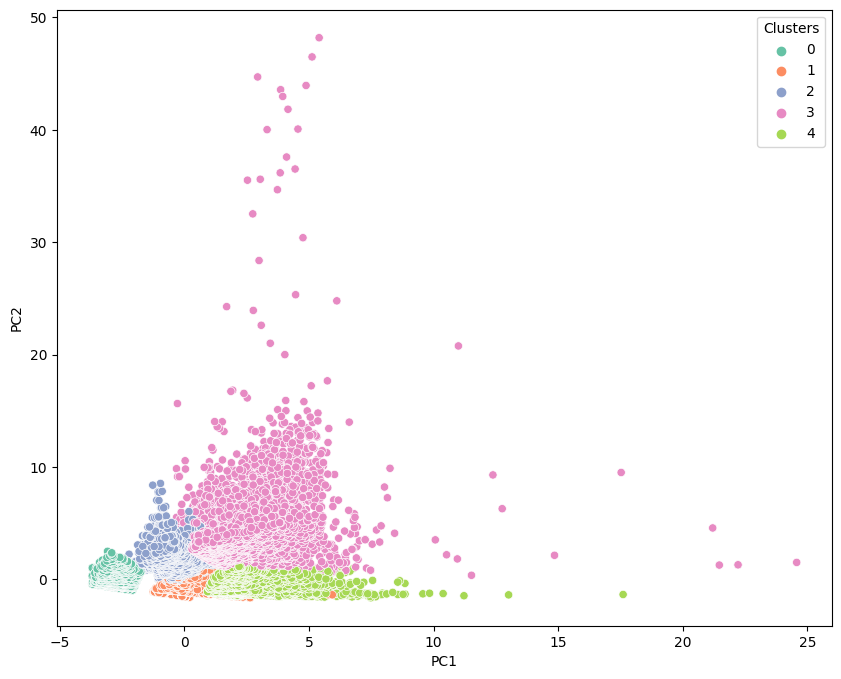

In [ ]:
# Plot the clusters on reduced dimension data
plt.figure(figsize=(10,8))
sns.scatterplot(x="PC1", y="PC2", hue="Clusters", data=PCA_ds, palette="Set2")
plt.show()

In [ ]:
df_2022

,ent,LAST_VISIT,TOTAL_VISIT,TOTAL_SPEND,AVG_MONTHLY_VISIT,AVG_MONTHLY_SPEND,AVG_BASKET_SIZE,REV_PER_UNIT,Clusters
0,TCC4ZWWCE37,2022-06-04,15,10212000,2.500000,1.702000e+06,6.808000e+05,166946.666667,3
1,TCC4E1JJ3C0,2022-06-29,19,20718000,3.166667,3.453000e+06,1.090421e+06,383166.004171,3
2,TCC4ZWRQECI,2022-06-20,20,21564000,3.333333,3.594000e+06,1.078200e+06,245719.404762,3
3,TCCE1R14Q17,2022-06-30,25,11142000,4.166667,1.857000e+06,4.456800e+05,190126.111111,3
4,TCC4EERQ410,2022-06-18,18,12901000,3.000000,2.150167e+06,7.167222e+05,327806.481481,3
...,...,...,...,...,...,...,...,...,...
184453,TCCERQR33CF,2022-06-28,13,3747000,4.333333,1.249000e+06,2.882308e+05,248974.358974,2
184454,TCCERW1Q1QF,2022-06-18,13,3854000,4.333333,1.284667e+06,2.964615e+05,182230.769231,2
184455,TCC4144JJ3U,2022-06-08,13,3246000,6.500000,1.623000e+06,2.496923e+05,234769.230769,2
184456,TCCER3QQJR0,2022-06-29,13,3691000,6.500000,1.845500e+06,2.839231e+05,157269.230769,2


In [ ]:
df_2022['Clusters'].value_counts()


4    64958
2    55694
0    40695
1    11768
3    11343
Name: Clusters, dtype: int64

In [ ]:
df_2022.to_csv('Cluster_H1_2022.csv', index = False)

In [ ]:
feature =  df_2022[['TOTAL_VISIT', 'TOTAL_SPEND', 'AVG_MONTHLY_VISIT','AVG_MONTHLY_SPEND', 'AVG_BASKET_SIZE', 'Clusters']]

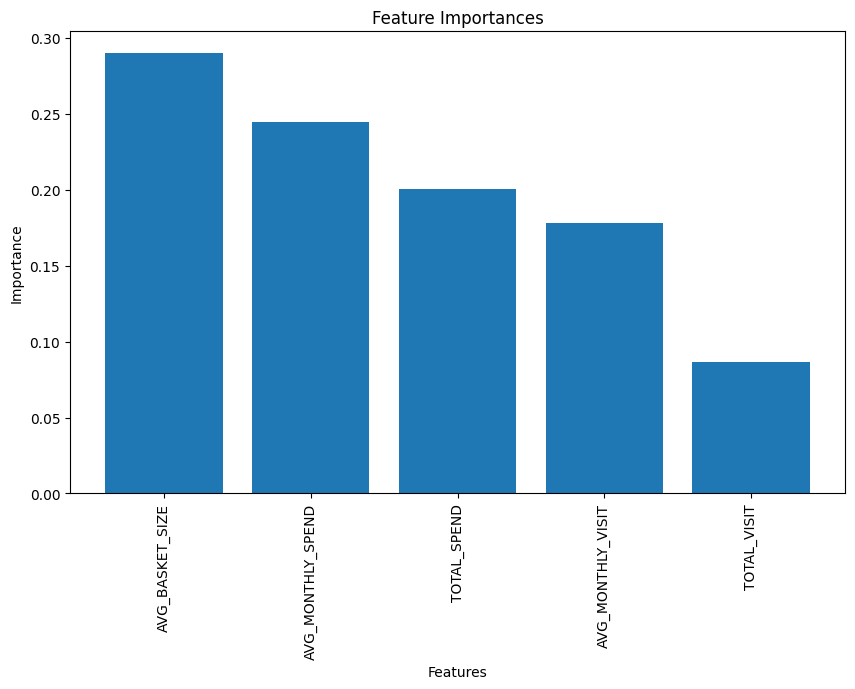

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt


# Separate the features (X) and the target variable (y)
X = feature.drop('Clusters', axis=1)

y = feature['Clusters']

# Create an instance of RandomForestClassifier
rf = RandomForestClassifier()

# Fit the model on the data
rf.fit(X, y)

# Retrieve the feature importances
importances = rf.feature_importances_

# Sort the feature importances in descending order
indices = np.argsort(importances)[::-1]

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.show()


In [ ]:
importances[indices]

array([0.28145952, 0.26460182, 0.19193348, 0.18351931, 0.07848587])

In [ ]:
X.columns[indices]

Index(['AVG_BASKET_SIZE', 'AVG_MONTHLY_SPEND', 'AVG_MONTHLY_VISIT',
       'TOTAL_SPEND', 'TOTAL_VISIT'],
      dtype='object')

In [ ]:
# Select the top features based on importance
top_features = X.columns[indices]
top_importances = importances[indices]

# Create a DataFrame with top feature importances and corresponding column names
feature_importance_df = pd.DataFrame({'Feature': top_features, 'Importance': top_importances})

In [ ]:
feature_importance_df

,Feature,Importance
0,AVG_BASKET_SIZE,0.330102
1,AVG_MONTHLY_SPEND,0.235310
2,TOTAL_SPEND,0.195629
3,AVG_MONTHLY_VISIT,0.167200
4,TOTAL_VISIT,0.071759


In [ ]:
selected_cols = ['TOTAL_VISIT'	,'TOTAL_SPEND'	,'AVG_MONTHLY_VISIT' ,	'AVG_MONTHLY_SPEND'	,'AVG_BASKET_SIZE','REV_PER_UNIT']
df_features = H1_2021_AVG[selected_cols]

In [ ]:
from sklearn.preprocessing import StandardScaler


In [ ]:
# Standardize the features
scaler = StandardScaler()
df_features_scaled = scaler.fit_transform(df_features)

In [ ]:
# Initiating the K-means Clustering model
KM = KMeans(n_clusters=5, random_state=666)
# Fit model and predict clusters
yhat_KM = KM.fit_predict(df_features_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
# create a new column in the scaled dataframe with the cluster labels
df_features_scaled = pd.DataFrame(df_features_scaled, columns=df_features.columns)
df_features_scaled["Clusters"] = pd.Series(yhat_KM, index=df_features_scaled.index)

In [ ]:
df_2021 = H1_2021_AVG.copy()

In [ ]:
# Adding the Clusters feature to the original dataframe.
df_2021 ["Clusters"] = df_features_scaled["Clusters"]

In [ ]:
df_2021

,ent,LAST_VISIT,TOTAL_VISIT,TOTAL_SPEND,AVG_MONTHLY_VISIT,AVG_MONTHLY_SPEND,AVG_BASKET_SIZE,REV_PER_UNIT,Clusters
0,TCC4RJ11QE7,2021-06-02,15,16723000,3.750000,4.180750e+06,1.114867e+06,357910.476190,0
1,TCC43C3JRJ5,2021-04-23,14,2811500,3.500000,7.028750e+05,2.008214e+05,200821.428571,1
2,TZEEQRRU,2021-06-10,17,13326000,2.833333,2.221000e+06,7.838824e+05,470274.509804,0
3,TCC4QEZQW4I,2021-05-08,28,9670000,5.600000,1.934000e+06,3.453571e+05,262857.142857,0
4,TCC41E3E142,2021-06-09,37,27613000,6.166667,4.602167e+06,7.462973e+05,360878.378378,0
...,...,...,...,...,...,...,...,...,...
325622,TCCECE4E1ZF,2021-06-20,13,6682500,4.333333,2.227500e+06,5.140385e+05,314064.102564,0
325623,TCCECE4C43I,2021-06-11,13,6357500,4.333333,2.119167e+06,4.890385e+05,346282.051282,0
325624,TCC4QR314RY,2021-06-21,13,9102500,6.500000,4.551250e+06,7.001923e+05,396493.589744,0
325625,TCCEC1CCRCK,2021-06-22,13,6560500,6.500000,3.280250e+06,5.046538e+05,240301.282051,0


In [ ]:
#Initiating PCA to reduce dimentions aka features to 2
pca = PCA(n_components=2,random_state=1)
pca.fit(df_features_scaled)
PCA_ds = pd.DataFrame(pca.transform(df_features_scaled), columns=(["PC1","PC2"]))
PCA_ds.describe().T

,count,mean,std,min,25%,50%,75%,max
PC1,325627.0,-1.452390e-16,1.833751,-2.383425,-1.583696,0.443736,1.037140,51.612213
PC2,325627.0,1.117223e-17,1.490651,-4.147540,-0.951778,-0.292338,1.199381,89.693641


In [ ]:
PCA_ds

,PC1,PC2
0,6.025988,3.329287
1,2.749345,-1.742284
2,4.849034,1.507447
3,7.086149,0.105919
4,11.174053,4.785546
...,...,...
325622,4.457537,-0.031049
325623,4.380276,-0.133525
325624,6.425928,1.903125
325625,5.826620,0.320800


In [ ]:
PCA_ds["Clusters"] = yhat_KM

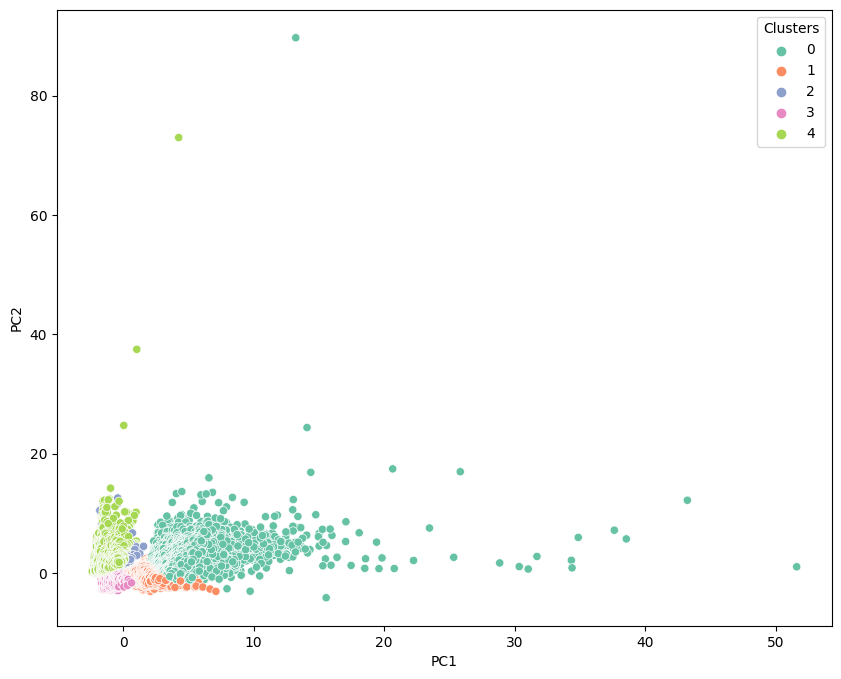

In [ ]:
# Plot the clusters on reduced dimension data
plt.figure(figsize=(10,8))
sns.scatterplot(x="PC1", y="PC2", hue="Clusters", data=PCA_ds, palette="Set2")
plt.show()

In [ ]:
df_2021

,ent,LAST_VISIT,TOTAL_VISIT,TOTAL_SPEND,AVG_MONTHLY_VISIT,AVG_MONTHLY_SPEND,AVG_BASKET_SIZE,REV_PER_UNIT,Clusters
0,TCC4RJ11QE7,2021-06-02,15,16723000,3.750000,4.180750e+06,1.114867e+06,357910.476190,0
1,TCC43C3JRJ5,2021-04-23,14,2811500,3.500000,7.028750e+05,2.008214e+05,200821.428571,1
2,TZEEQRRU,2021-06-10,17,13326000,2.833333,2.221000e+06,7.838824e+05,470274.509804,0
3,TCC4QEZQW4I,2021-05-08,28,9670000,5.600000,1.934000e+06,3.453571e+05,262857.142857,0
4,TCC41E3E142,2021-06-09,37,27613000,6.166667,4.602167e+06,7.462973e+05,360878.378378,0
...,...,...,...,...,...,...,...,...,...
325622,TCCECE4E1ZF,2021-06-20,13,6682500,4.333333,2.227500e+06,5.140385e+05,314064.102564,0
325623,TCCECE4C43I,2021-06-11,13,6357500,4.333333,2.119167e+06,4.890385e+05,346282.051282,0
325624,TCC4QR314RY,2021-06-21,13,9102500,6.500000,4.551250e+06,7.001923e+05,396493.589744,0
325625,TCCEC1CCRCK,2021-06-22,13,6560500,6.500000,3.280250e+06,5.046538e+05,240301.282051,0


In [ ]:
df_2021['Clusters'].value_counts()


1    146324
4     68721
3     66801
2     23315
0     20466
Name: Clusters, dtype: int64

In [ ]:
df_2021

,ent,LAST_VISIT,TOTAL_VISIT,TOTAL_SPEND,AVG_MONTHLY_VISIT,AVG_MONTHLY_SPEND,AVG_BASKET_SIZE,REV_PER_UNIT,Clusters
0,TCC4RJ11QE7,2021-06-02,15,16723000,3.750000,4.180750e+06,1.114867e+06,357910.476190,0
1,TCC43C3JRJ5,2021-04-23,14,2811500,3.500000,7.028750e+05,2.008214e+05,200821.428571,1
2,TZEEQRRU,2021-06-10,17,13326000,2.833333,2.221000e+06,7.838824e+05,470274.509804,0
3,TCC4QEZQW4I,2021-05-08,28,9670000,5.600000,1.934000e+06,3.453571e+05,262857.142857,0
4,TCC41E3E142,2021-06-09,37,27613000,6.166667,4.602167e+06,7.462973e+05,360878.378378,0
...,...,...,...,...,...,...,...,...,...
325622,TCCECE4E1ZF,2021-06-20,13,6682500,4.333333,2.227500e+06,5.140385e+05,314064.102564,0
325623,TCCECE4C43I,2021-06-11,13,6357500,4.333333,2.119167e+06,4.890385e+05,346282.051282,0
325624,TCC4QR314RY,2021-06-21,13,9102500,6.500000,4.551250e+06,7.001923e+05,396493.589744,0
325625,TCCEC1CCRCK,2021-06-22,13,6560500,6.500000,3.280250e+06,5.046538e+05,240301.282051,0


In [ ]:
df_2021.to_csv('Cluster_2021.csv', index=False)

In [ ]:
feature =  df_2021[['TOTAL_VISIT', 'TOTAL_SPEND', 'AVG_MONTHLY_VISIT','AVG_MONTHLY_SPEND', 'AVG_BASKET_SIZE', 'Clusters']]

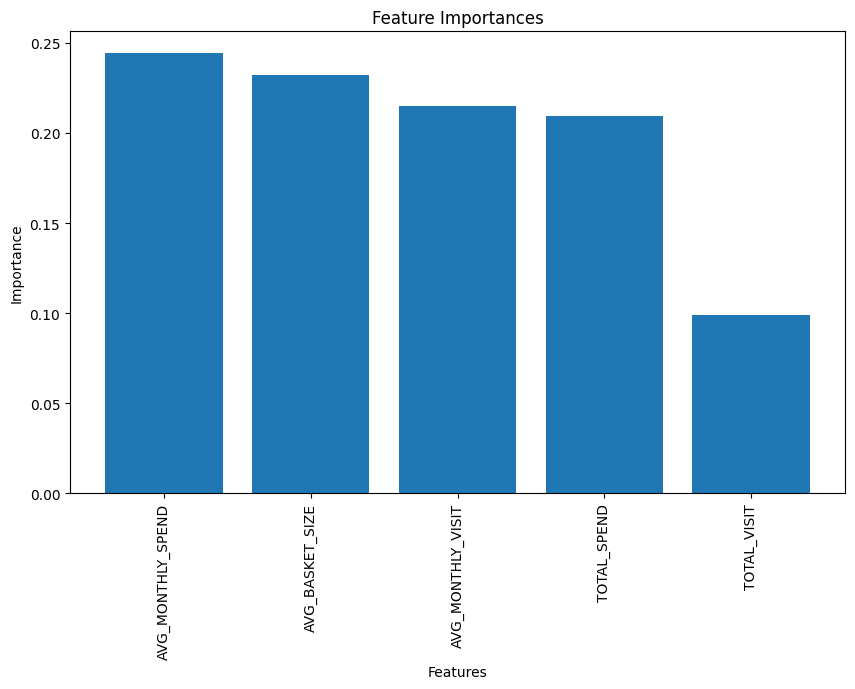

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt


# Separate the features (X) and the target variable (y)
X = feature.drop('Clusters', axis=1)

y = feature['Clusters']

# Create an instance of RandomForestClassifier
rf = RandomForestClassifier()

# Fit the model on the data
rf.fit(X, y)

# Retrieve the feature importances
importances = rf.feature_importances_

# Sort the feature importances in descending order
indices = np.argsort(importances)[::-1]

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.show()


In [ ]:
importances[indices]

array([0.24415042, 0.23210573, 0.21497969, 0.20950763, 0.09925652])

In [ ]:
X.columns[indices]

Index(['AVG_MONTHLY_SPEND', 'AVG_BASKET_SIZE', 'AVG_MONTHLY_VISIT',
       'TOTAL_SPEND', 'TOTAL_VISIT'],
      dtype='object')

In [ ]:
# Select the top features based on importance
top_features = X.columns[indices]
top_importances = importances[indices]

# Create a DataFrame with top feature importances and corresponding column names
feature_importance_df = pd.DataFrame({'Feature': top_features, 'Importance': top_importances})

In [ ]:
feature_importance_df

,Feature,Importance
0,AVG_MONTHLY_SPEND,0.244150
1,AVG_BASKET_SIZE,0.232106
2,AVG_MONTHLY_VISIT,0.214980
3,TOTAL_SPEND,0.209508
4,TOTAL_VISIT,0.099257


In [ ]:
selected_cols = ['TOTAL_VISIT'	,'TOTAL_SPEND'	,'AVG_MONTHLY_VISIT' ,	'AVG_MONTHLY_SPEND'	,'AVG_BASKET_SIZE','REV_PER_UNIT']
df_features = H2_2022_AVG[selected_cols]

In [ ]:
from sklearn.preprocessing import StandardScaler


In [ ]:
# Standardize the features
scaler = StandardScaler()
df_features_scaled = scaler.fit_transform(df_features)

In [ ]:
# Initiating the K-means Clustering model
KM = KMeans(n_clusters=5, random_state=666)
# Fit model and predict clusters
yhat_KM = KM.fit_predict(df_features_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
# create a new column in the scaled dataframe with the cluster labels
df_features_scaled = pd.DataFrame(df_features_scaled, columns=df_features.columns)
df_features_scaled["Clusters"] = pd.Series(yhat_KM, index=df_features_scaled.index)

In [ ]:
df_H2_2022 = H2_2022_AVG.copy()

In [ ]:
# Adding the Clusters feature to the original dataframe.
df_H2_2022 ["Clusters"] = df_features_scaled["Clusters"]

In [ ]:
df_H2_2022

,ent,LAST_VISIT,TOTAL_VISIT,TOTAL_SPEND,AVG_MONTHLY_VISIT,AVG_MONTHLY_SPEND,AVG_BASKET_SIZE,REV_PER_UNIT,Clusters
0,TCC4ZQWEJ4F,2022-12-24,17,24091000,3.400000,4.818200e+06,1.417118e+06,368049.465241,3
1,TCC4JRCJ440,2022-12-19,34,17059000,5.666667,2.843167e+06,5.017353e+05,207514.379085,3
2,TCC4CWCECZY,2022-12-26,19,12990000,3.166667,2.165000e+06,6.836842e+05,413586.842105,3
3,TCC4QJ3344F,2022-12-28,17,10175400,2.833333,1.695900e+06,5.985529e+05,506219.607843,3
4,TCC41J3R4W0,2022-12-29,19,8863500,3.166667,1.477250e+06,4.665000e+05,197740.829346,3
...,...,...,...,...,...,...,...,...,...
143010,TCCEJRZ11C2,2022-12-20,13,1629500,6.500000,8.147500e+05,1.253462e+05,69192.307692,0
143011,TCCEJJJ3JWB,2022-12-20,13,1643000,6.500000,8.215000e+05,1.263846e+05,65653.846154,0
143012,TCCER3E4RZI,2022-12-31,13,3944000,6.500000,1.972000e+06,3.033846e+05,136615.384615,0
143013,TCCEJJECQQF,2022-12-30,13,1793000,6.500000,8.965000e+05,1.379231e+05,122038.461538,0


In [ ]:
df_H2_2022.to_csv('Cluster_H2_2022.csv', index=False)

In [ ]:
#Initiating PCA to reduce dimentions aka features to 2
pca = PCA(n_components=2,random_state=1)
pca.fit(df_features_scaled)
PCA_ds = pd.DataFrame(pca.transform(df_features_scaled), columns=(["PC1","PC2"]))
PCA_ds.describe().T

,count,mean,std,min,25%,50%,75%,max
PC1,143015.0,3.815661e-17,1.587383,-1.785952,-0.969097,-0.281899,0.472413,43.254919
PC2,143015.0,5.067675e-17,1.514728,-10.266315,-1.065834,-0.295069,0.776429,14.268848


In [ ]:
PCA_ds

,PC1,PC2
0,7.500416,2.657961
1,8.533699,-0.315088
2,4.488386,0.580369
3,3.378709,0.446119
4,3.509625,-0.381196
...,...,...
143010,3.123782,-3.751094
143011,3.129981,-3.752069
143012,4.069872,-2.936195
143013,3.182295,-3.623469


In [ ]:
PCA_ds["Clusters"] = yhat_KM

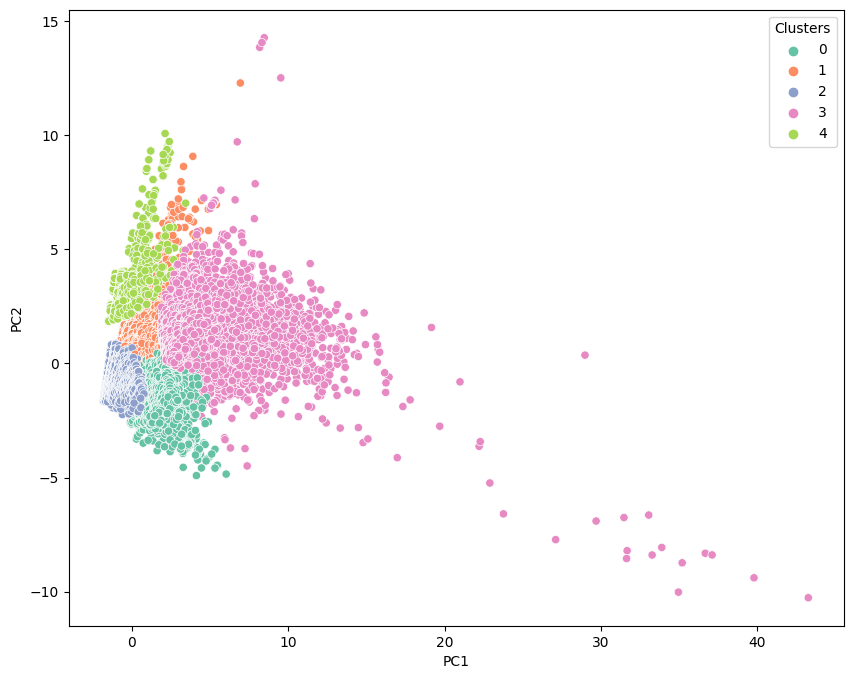

In [ ]:
# Plot the clusters on reduced dimension data
plt.figure(figsize=(10,8))
sns.scatterplot(x="PC1", y="PC2", hue="Clusters", data=PCA_ds, palette="Set2")
plt.show()

In [ ]:
df_H2_2022

,ent,LAST_VISIT,TOTAL_VISIT,TOTAL_SPEND,AVG_MONTHLY_VISIT,AVG_MONTHLY_SPEND,AVG_BASKET_SIZE,REV_PER_UNIT,Clusters
0,TCC4ZQWEJ4F,2022-12-24,17,24091000,3.400000,4.818200e+06,1.417118e+06,368049.465241,3
1,TCC4JRCJ440,2022-12-19,34,17059000,5.666667,2.843167e+06,5.017353e+05,207514.379085,3
2,TCC4CWCECZY,2022-12-26,19,12990000,3.166667,2.165000e+06,6.836842e+05,413586.842105,3
3,TCC4QJ3344F,2022-12-28,17,10175400,2.833333,1.695900e+06,5.985529e+05,506219.607843,3
4,TCC41J3R4W0,2022-12-29,19,8863500,3.166667,1.477250e+06,4.665000e+05,197740.829346,3
...,...,...,...,...,...,...,...,...,...
143010,TCCEJRZ11C2,2022-12-20,13,1629500,6.500000,8.147500e+05,1.253462e+05,69192.307692,0
143011,TCCEJJJ3JWB,2022-12-20,13,1643000,6.500000,8.215000e+05,1.263846e+05,65653.846154,0
143012,TCCER3E4RZI,2022-12-31,13,3944000,6.500000,1.972000e+06,3.033846e+05,136615.384615,0
143013,TCCEJJECQQF,2022-12-30,13,1793000,6.500000,8.965000e+05,1.379231e+05,122038.461538,0


In [ ]:
df_H2_2022['Clusters'].value_counts()


0    45965
1    41961
2    36679
4    10921
3     7489
Name: Clusters, dtype: int64

In [ ]:
feature =  df_H2_2022[['TOTAL_VISIT', 'TOTAL_SPEND', 'AVG_MONTHLY_VISIT','AVG_MONTHLY_SPEND', 'AVG_BASKET_SIZE', 'Clusters']]

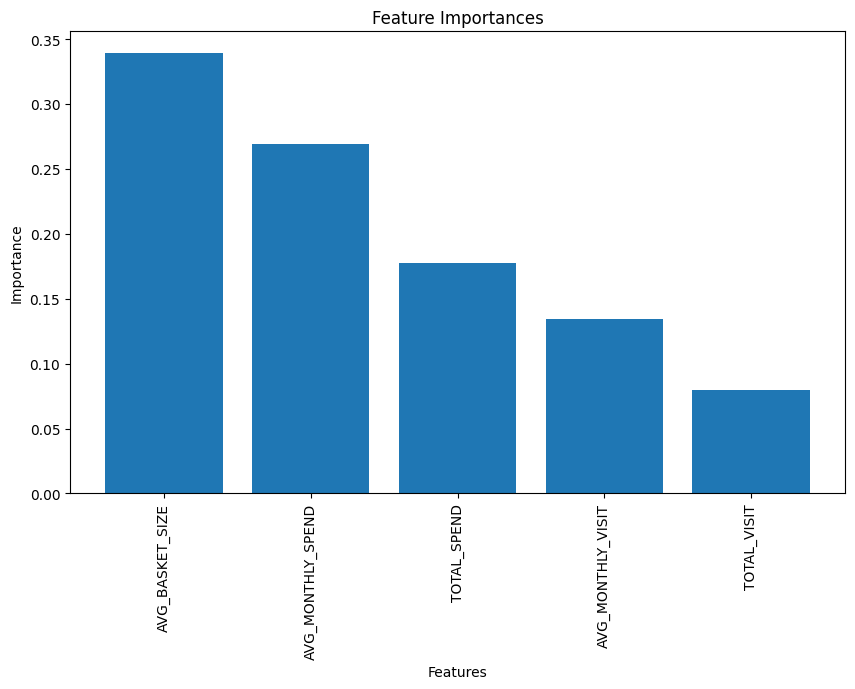

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt


# Separate the features (X) and the target variable (y)
X = feature.drop('Clusters', axis=1)

y = feature['Clusters']

# Create an instance of RandomForestClassifier
rf = RandomForestClassifier()

# Fit the model on the data
rf.fit(X, y)

# Retrieve the feature importances
importances = rf.feature_importances_

# Sort the feature importances in descending order
indices = np.argsort(importances)[::-1]

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.show()


In [ ]:
importances[indices]

array([0.33898828, 0.26906159, 0.17765957, 0.1343518 , 0.07993876])

In [ ]:
X.columns[indices]

Index(['AVG_BASKET_SIZE', 'AVG_MONTHLY_SPEND', 'TOTAL_SPEND',
       'AVG_MONTHLY_VISIT', 'TOTAL_VISIT'],
      dtype='object')

In [ ]:
# Select the top features based on importance
top_features = X.columns[indices]
top_importances = importances[indices]

# Create a DataFrame with top feature importances and corresponding column names
feature_importance_df = pd.DataFrame({'Feature': top_features, 'Importance': top_importances})

In [ ]:
feature_importance_df

,Feature,Importance
0,AVG_BASKET_SIZE,0.338988
1,AVG_MONTHLY_SPEND,0.269062
2,TOTAL_SPEND,0.177660
3,AVG_MONTHLY_VISIT,0.134352
4,TOTAL_VISIT,0.079939


In [ ]:
selected_cols = ['TOTAL_VISIT'	,'TOTAL_SPEND'	,'AVG_MONTHLY_VISIT' ,	'AVG_MONTHLY_SPEND'	,'AVG_BASKET_SIZE','REV_PER_UNIT']
df_features = H1_2023_AVG[selected_cols]

In [ ]:
from sklearn.preprocessing import StandardScaler


In [ ]:
# Standardize the features
scaler = StandardScaler()
df_features_scaled = scaler.fit_transform(df_features)

In [ ]:
# Initiating the K-means Clustering model
KM = KMeans(n_clusters=5, random_state=666)
# Fit model and predict clusters
yhat_KM = KM.fit_predict(df_features_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
# create a new column in the scaled dataframe with the cluster labels
df_features_scaled = pd.DataFrame(df_features_scaled, columns=df_features.columns)
df_features_scaled["Clusters"] = pd.Series(yhat_KM, index=df_features_scaled.index)

In [ ]:
df_H1_2023 = H1_2023_AVG.copy()

In [ ]:
# Adding the Clusters feature to the original dataframe.
df_H1_2023 ["Clusters"] = df_features_scaled["Clusters"]

In [ ]:
df_H1_2023

,ent,LAST_VISIT,TOTAL_VISIT,TOTAL_SPEND,AVG_MONTHLY_VISIT,AVG_MONTHLY_SPEND,AVG_BASKET_SIZE,REV_PER_UNIT,Clusters
0,TCC4JZCEWZ7,2023-06-06,18,16960500,3.000000,2.826750e+06,9.422500e+05,313769.620811,2
1,TCC4Q4WJCZ2,2023-06-30,39,26856000,6.500000,4.476000e+06,6.886154e+05,263603.565879,2
2,TCC4EZR4Z3P,2023-06-28,28,24039000,4.666667,4.006500e+06,8.585357e+05,311420.887446,2
3,TCC4R4EQWZP,2023-06-30,17,17600000,2.833333,2.933333e+06,1.035294e+06,310781.372549,2
4,TCC44EWQRJ5,2023-06-17,23,18036500,3.833333,3.006083e+06,7.841957e+05,376568.840580,2
...,...,...,...,...,...,...,...,...,...
100264,TCC43W14CC7,2023-06-30,14,6729000,2.333333,1.121500e+06,4.806429e+05,250428.571429,4
100265,TCC4C313REK,2023-06-22,14,4954000,2.333333,8.256667e+05,3.538571e+05,206002.380952,4
100266,TZ3QE11P,2023-06-26,14,4336000,2.800000,8.672000e+05,3.097143e+05,225547.619048,4
100267,TW33J4CP,2023-06-30,14,30879000,2.333333,5.146500e+06,2.205643e+06,318892.857143,2


In [ ]:
#Initiating PCA to reduce dimentions aka features to 2
pca = PCA(n_components=2,random_state=1)
pca.fit(df_features_scaled)
PCA_ds = pd.DataFrame(pca.transform(df_features_scaled), columns=(["PC1","PC2"]))
PCA_ds.describe().T

,count,mean,std,min,25%,50%,75%,max
PC1,100269.0,-1.814109e-17,1.857899,-1.996818,-1.315788,-0.938202,1.710454,26.096418
PC2,100269.0,4.762037e-17,1.520597,-2.595195,-1.103291,-0.436982,1.034394,35.309046


In [ ]:
PCA_ds

,PC1,PC2
0,3.118073,3.207140
1,7.051463,6.178589
2,5.263266,5.243000
3,3.042571,3.396540
4,3.929207,3.594845
...,...,...
100264,3.012861,-0.432401
100265,2.831700,-1.009470
100266,2.963505,-1.072275
100267,3.946844,7.471632


In [ ]:
PCA_ds["Clusters"] = yhat_KM

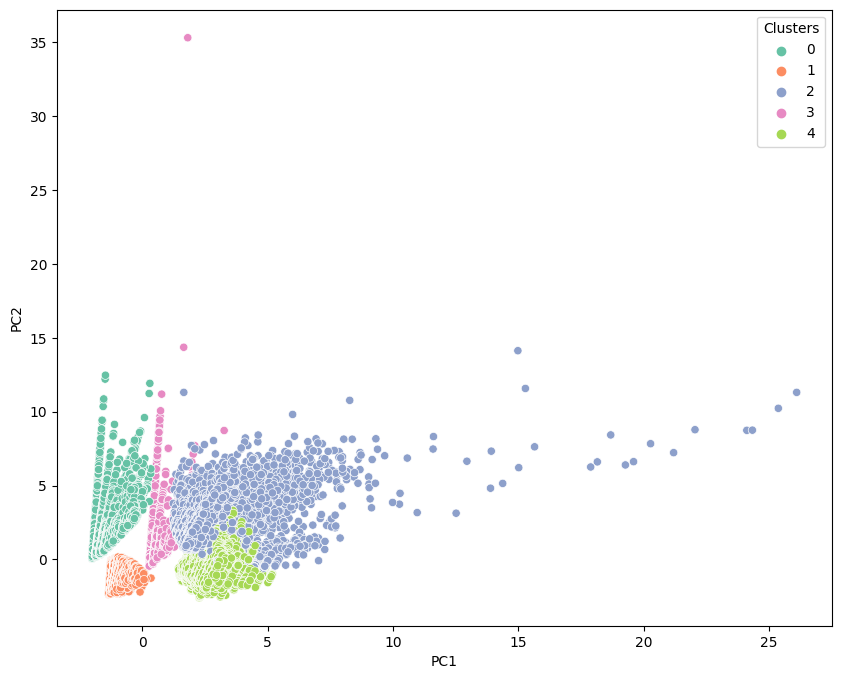

In [ ]:
# Plot the clusters on reduced dimension data
plt.figure(figsize=(10,8))
sns.scatterplot(x="PC1", y="PC2", hue="Clusters", data=PCA_ds, palette="Set2")
plt.show()

In [ ]:
df_H1_2023

,ent,LAST_VISIT,TOTAL_VISIT,TOTAL_SPEND,AVG_MONTHLY_VISIT,AVG_MONTHLY_SPEND,AVG_BASKET_SIZE,REV_PER_UNIT,Clusters
0,TCC4JZCEWZ7,2023-06-06,18,16960500,3.000000,2.826750e+06,9.422500e+05,313769.620811,2
1,TCC4Q4WJCZ2,2023-06-30,39,26856000,6.500000,4.476000e+06,6.886154e+05,263603.565879,2
2,TCC4EZR4Z3P,2023-06-28,28,24039000,4.666667,4.006500e+06,8.585357e+05,311420.887446,2
3,TCC4R4EQWZP,2023-06-30,17,17600000,2.833333,2.933333e+06,1.035294e+06,310781.372549,2
4,TCC44EWQRJ5,2023-06-17,23,18036500,3.833333,3.006083e+06,7.841957e+05,376568.840580,2
...,...,...,...,...,...,...,...,...,...
100264,TCC43W14CC7,2023-06-30,14,6729000,2.333333,1.121500e+06,4.806429e+05,250428.571429,4
100265,TCC4C313REK,2023-06-22,14,4954000,2.333333,8.256667e+05,3.538571e+05,206002.380952,4
100266,TZ3QE11P,2023-06-26,14,4336000,2.800000,8.672000e+05,3.097143e+05,225547.619048,4
100267,TW33J4CP,2023-06-30,14,30879000,2.333333,5.146500e+06,2.205643e+06,318892.857143,2


In [ ]:
df_H1_2023['Clusters'].value_counts()


1    32162
4    29661
0    27428
3     5699
2     5319
Name: Clusters, dtype: int64

In [ ]:
df_H1_2023.to_csv('Cluster_H1_2023.csv', index = False)

In [ ]:
feature =  df_H1_2023[['TOTAL_VISIT', 'TOTAL_SPEND', 'AVG_MONTHLY_VISIT','AVG_MONTHLY_SPEND', 'AVG_BASKET_SIZE', 'Clusters']]

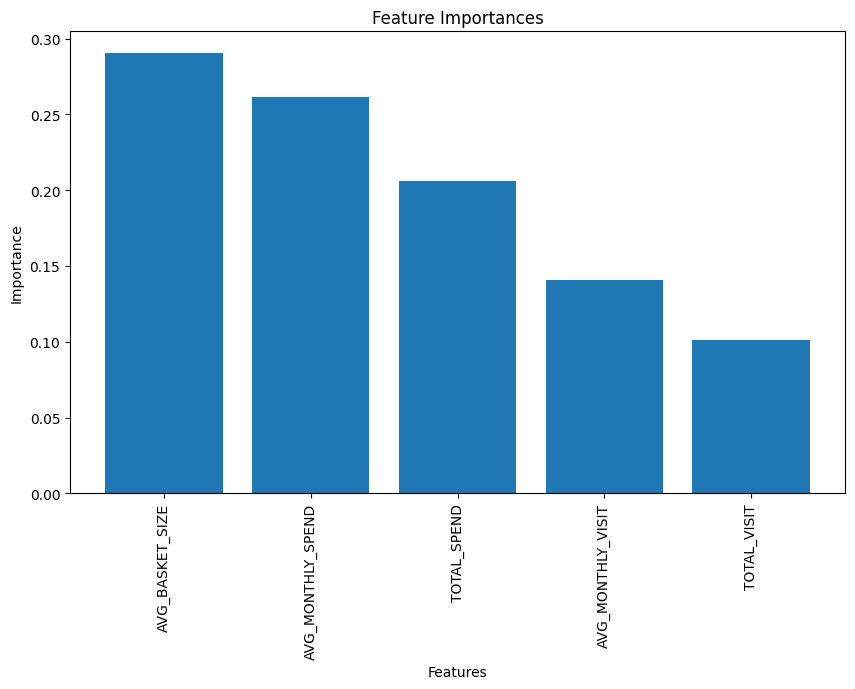

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt


# Separate the features (X) and the target variable (y)
X = feature.drop('Clusters', axis=1)

y = feature['Clusters']

# Create an instance of RandomForestClassifier
rf = RandomForestClassifier()

# Fit the model on the data
rf.fit(X, y)

# Retrieve the feature importances
importances = rf.feature_importances_

# Sort the feature importances in descending order
indices = np.argsort(importances)[::-1]

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.show()


In [ ]:
importances[indices]

array([0.29024721, 0.26166245, 0.20634126, 0.14070712, 0.10104195])

In [ ]:
X.columns[indices]

Index(['AVG_BASKET_SIZE', 'AVG_MONTHLY_SPEND', 'TOTAL_SPEND',
       'AVG_MONTHLY_VISIT', 'TOTAL_VISIT'],
      dtype='object')

In [ ]:
# Select the top features based on importance
top_features = X.columns[indices]
top_importances = importances[indices]

# Create a DataFrame with top feature importances and corresponding column names
feature_importance_df = pd.DataFrame({'Feature': top_features, 'Importance': top_importances})

In [ ]:
feature_importance_df

,Feature,Importance
0,AVG_BASKET_SIZE,0.290247
1,AVG_MONTHLY_SPEND,0.261662
2,TOTAL_SPEND,0.206341
3,AVG_MONTHLY_VISIT,0.140707
4,TOTAL_VISIT,0.101042
